<h1 style = "color: skyblue">Customer Segmentation Dataset ML Kaggle</h1>

<h1 style = "color: skyblue">Importing modules</h1>

In [93]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [2]:
customers = pd.read_excel('./Online Retail.xlsx')
customers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
customers.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
134216,547830,22558,CLOTHES PEGS RETROSPOT PACK 24,1,2011-03-25 15:50:00,3.29,NaN,United Kingdom
53495,540838,22384,LUNCH BAG PINK POLKADOT,10,2011-01-11 15:13:00,1.65,13862.0,United Kingdom
206415,554935,22557,PLASTERS IN TIN VINTAGE PAISLEY,12,2011-05-27 13:30:00,1.65,14338.0,United Kingdom
511936,579508,82482,WOODEN PICTURE FRAME WHITE FINISH,1,2011-11-29 16:33:00,5.79,NaN,United Kingdom
408089,571931,22741,FUNKY DIVA PEN,2,2011-10-19 16:59:00,1.63,NaN,United Kingdom
193670,553541,21929,JUMBO BAG PINK VINTAGE PAISLEY,1,2011-05-17 15:33:00,4.96,NaN,United Kingdom
330673,565920,47566,PARTY BUNTING,4,2011-09-08 08:56:00,4.95,15298.0,United Kingdom
151816,549569,22292,HANGING CHICK YELLOW DECORATION,4,2011-04-10 15:15:00,1.45,15547.0,United Kingdom
435118,574074,22080,RIBBON REEL POLKADOTS,1,2011-11-02 15:33:00,3.29,NaN,United Kingdom
218649,556056,23239,SET OF 4 KNICK KNACK TINS POPPIES,1,2011-06-08 13:35:00,4.15,17841.0,United Kingdom


<h1 style = "color: skyblue">Data information and cleaning</h1>

In [4]:
customers.isna().sum() # description and customerID NaN values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
customers.notna().sum()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [6]:
customers.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
customers['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [18]:
# Clean dataset for NaN values and drop useless columns

new_customers = customers.drop(columns = ['StockCode', 'Description', 'InvoiceDate', 'CustomerID', 'InvoiceNo'], axis = 1)
new_customers.sample(5)

,Quantity,UnitPrice,Country
175772,4,4.15,Belgium
66186,12,1.25,United Kingdom
386098,3,2.10,United Kingdom
431001,2,2.46,United Kingdom
51969,2,0.81,United Kingdom


<h1 style = "color: skyblue">Preprocessing</h1>

In [34]:
# Standardize the values

X = customers[['Quantity', 'UnitPrice']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.01628867, -0.02130135],
       [-0.01628867, -0.01262006],
       [-0.00711777, -0.01923438],
       ...,
       [-0.02545958, -0.00476555],
       [-0.02545958, -0.00476555],
       [-0.03004503,  0.00350235]])

In [35]:
# Convert cathegorical feature to integers

countries = customers['Country']
countries_2d = [[country] for country in countries]
ordinal = OrdinalEncoder()
countries_2d_encoded = ordinal.fit_transform(countries_2d)
countries_2d_encoded

array([[36.],
       [36.],
       [36.],
       ...,
       [13.],
       [13.],
       [13.]])

In [36]:
customers_scaled = pd.DataFrame(X_scaled, columns = X.columns)
customers_scaled['Country'] = countries_2d_encoded
customers_scaled

,Quantity,UnitPrice,Country
0,-0.016289,-0.021301,36.0
1,-0.016289,-0.012620,36.0
2,-0.007118,-0.019234,36.0
3,-0.016289,-0.012620,36.0
4,-0.016289,-0.012620,36.0
...,...,...,...
541904,0.011224,-0.038871,13.0
541905,-0.016289,-0.025952,13.0
541906,-0.025460,-0.004766,13.0
541907,-0.025460,-0.004766,13.0


In [39]:
countries_encoded = countries_2d_encoded.ravel()

if len(countries_encoded) == X_scaled.shape[0]:
    X_scaled_with_countries = np.concatenate((X_scaled, countries_2d_encoded), axis=1)

X_scaled_with_countries

array([[-1.62886737e-02, -2.13013503e-02,  3.60000000e+01],
       [-1.62886737e-02, -1.26200559e-02,  3.60000000e+01],
       [-7.11776751e-03, -1.92343755e-02,  3.60000000e+01],
       ...,
       [-2.54595799e-02, -4.76555138e-03,  1.30000000e+01],
       [-2.54595799e-02, -4.76555138e-03,  1.30000000e+01],
       [-3.00450330e-02,  3.50234809e-03,  1.30000000e+01]])

<h1 style = "color: skyblue">Training</h1>

In [65]:
inertia = []

for nr_c in range(1, 100):
    kmeans = KMeans(n_clusters = nr_c, random_state = 42, n_init = 'auto')
    kmeans.fit(X_scaled_with_countries)
    inertia.append(kmeans.inertia_)
inertia

[22068662.06032874,
 2451218.6576774875,
 1942457.9145583683,
 1352341.2592110483,
 1046433.430715984,
 793111.349943083,
 687972.2774311367,
 442074.4297721669,
 346032.1862052187,
 258902.24837180096,
 239397.01902031145,
 181191.9899295503,
 155034.67016868995,
 115473.56272560162,
 109352.78362506468,
 100747.0334755452,
 87413.74285388397,
 80882.12612250871,
 71203.8376824142,
 63329.175854243214,
 57486.251323851815,
 54075.60205436449,
 48217.28026529282,
 42754.810488089715,
 38408.5295245317,
 35153.78101337051,
 34260.99194638404,
 32817.5255498556,
 32334.250964551822,
 28928.487261057817,
 26471.400520271894,
 25315.036033832268,
 23086.8497287447,
 22171.01093864813,
 19991.623841756544,
 19075.822410071996,
 18386.284202264887,
 17403.205927230654,
 15971.732438372974,
 15071.969232048637,
 14514.02462533601,
 14258.646896932747,
 13689.463746195817,
 13204.13966741915,
 12766.196876716069,
 12359.660476208579,
 11876.385890904801,
 11223.063572062125,
 10845.50368459314

<h1 style = "color: skyblue">Plot for the perfect cluster number</h1>

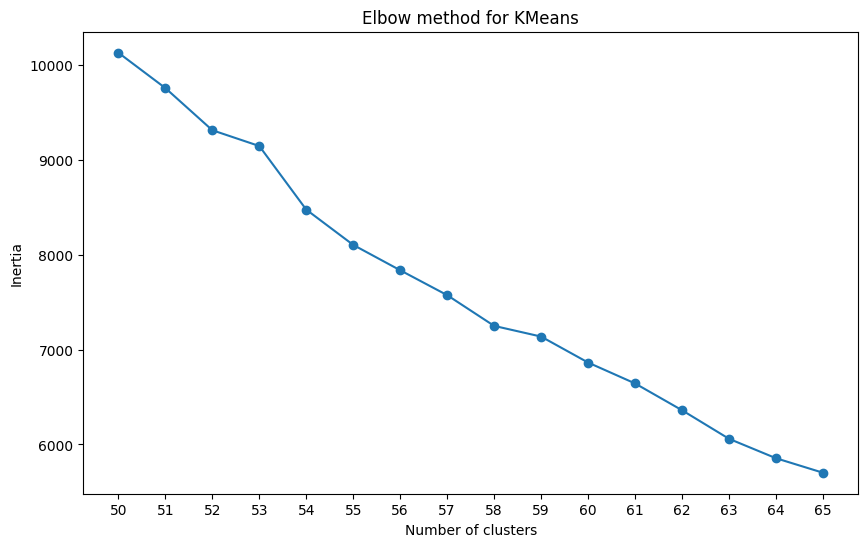

In [87]:
cluster_range = range(50, 66) 

inertia_subset = inertia[50:66]

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_subset, marker='o')
plt.title('Elbow method for KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.show()

In [83]:
print("Length of inertia array:", len(inertia))


Length of inertia array: 99


In [104]:
kmeans = KMeans(n_clusters = 54, random_state = 42, n_init = 'auto')
kmeans_labels = kmeans.fit_predict(X_scaled_with_countries)
kmeans_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [105]:

# Assume X_scaled is the array of scaled data and kmeans_labels contains the cluster labels
# Calculate the silhouette score
score = silhouette_score(X_scaled_with_countries, kmeans_labels)

print("Silhouette score:", score)

Silhouette score: 0.5575825487761465
